# **Домашнее задание 2: Градиентный спуск (pro)**

В этом задании две части - теоретическая и практическая. Теорию можно набирать, используя LaTex или просто решать на листочке, сфотографировать и отправить вместе с заполненным ноутбуком в anytask.

Максимальный балл за домашнее задание - 10.

## Часть 1 (теоретическая)

## Задание 1 (**1.5 балла**)

В случае одномерной Ridge-регрессии минимизируется функция со штрафом:
$$Q(w) = (y-xw)^T(y-xw)+\lambda w^2,$$
где $\lambda$ - положительный параметр, штрафующий функцию за слишком большие значения $w$.

1)  (**0.5 балла**) Найдите производную $\nabla_w Q(w)$, выведите формулу для оптимального $w$.

2) (**0.5 балла**) Найдите вторую производную $\nabla^2_w Q(w)$. Убедитесь, что мы оказались в точке минимума.

3) (**0.5 балла**) Выпишите шаг градиентного спуска в матричном виде.

`Ссылка на PDF File с решением`
https://drive.google.com/file/d/1GjPI9YE65Pte8yYzYpKVgsi8PXPvHAqs/view?usp=sharing



## Часть 2 (практическая).

## Задание 2 (**1 балл**)

Дана функция: $$f(x) = x\cdot sin(5x) + 0.1 \cdot x^2$$

Для этой функции:

- [ ] Реализуйте (или возьмите рассмотренный на занятии) метод градиетного спуска с условием остановки `stop=1e^-6` и шагом `eta=0.001`. **Градиетный спуск обязательно должен сохранять траекторию движения.**
- [ ] Задайте стартовые точки x0, равные 0, 0.5, 1
- [ ] Реализуйте нахождение точек минимума и максимума функции $f(x)$ (для нахождения максимума нам нужно в направлении градиента, а не антиградиента)
- [ ] Проанализируйте результаты. Предположите, с чем они связаны. Ответьте на вопросы:
    - Чему равны значения экстремумов?
    - При старте из какой начальной точки найденные экстремумы совпадут?




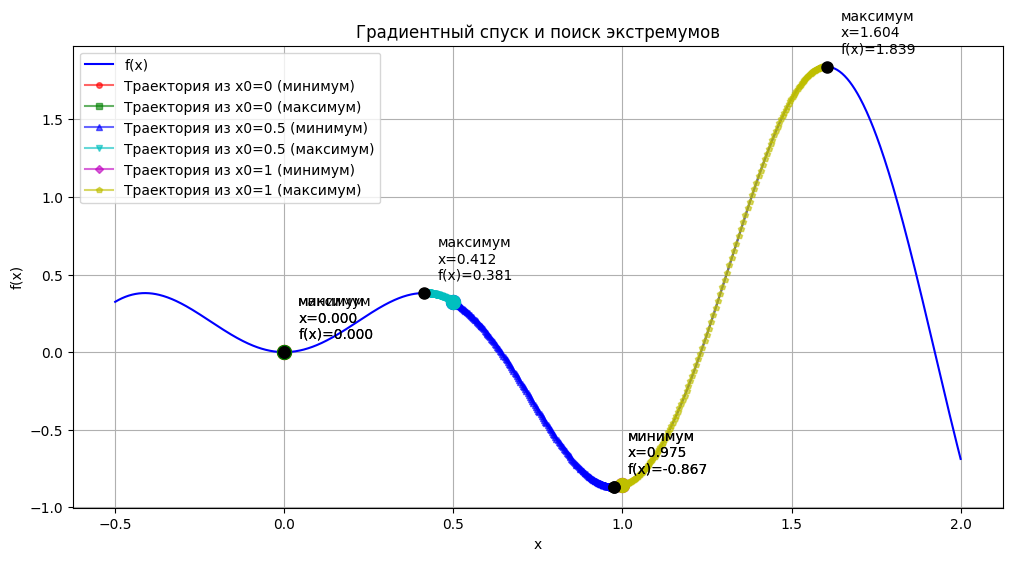


Результаты:

Начальная точка x0 = 0:
  минимум: x = 0.000000, f(x) = 0.000000
  максимум: x = 0.000000, f(x) = 0.000000

Начальная точка x0 = 0.5:
  минимум: x = 0.975061, f(x) = -0.867075
  максимум: x = 0.411857, f(x) = 0.380650

Начальная точка x0 = 1:
  минимум: x = 0.975138, f(x) = -0.867075
  максимум: x = 1.603529, f(x) = 1.839232


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Функция и её производная
def f(x):
    return x * np.sin(5*x) + 0.1 * x**2

def df(x):
    return np.sin(5*x) + 5*x*np.cos(5*x) + 0.2*x

# Градиентный спуск с сохранением траектории
def gradient_descent(f, df, x0, eta, max_iter=1000, tol=1e-6):
    x = x0
    trajectory = [x0]

    for i in range(max_iter):
        grad = df(x)
        x_new = x - eta * grad
        trajectory.append(x_new)

        if abs(x_new - x) < tol:
            break

        x = x_new

    return x, np.array(trajectory)

# Поиск экстремумов
def find_extremums(x0_values, eta=0.001):
    results = {}
    trajectories = []

    # Для каждой начальной точки находим минимум и максимум
    for x0 in x0_values:
        results[x0] = {}

        # Поиск минимума
        min_point, traj_min = gradient_descent(f, df, x0, eta)
        results[x0]['минимум'] = (min_point, f(min_point))
        trajectories.append(traj_min)

        # Поиск максимума
        def df_max(x):
            return -df(x)
        max_point, traj_max = gradient_descent(f, df_max, x0, eta)
        results[x0]['максимум'] = (max_point, f(max_point))
        trajectories.append(traj_max)

    return results, trajectories

# Начальные точки
x0_values = [0, 0.5, 1]
results, trajectories = find_extremums(x0_values)

# Визуализация
x = np.linspace(-0.5, 2, 1000)
plt.figure(figsize=(12, 6))
plt.plot(x, f(x), 'b-', label='f(x)')

# Отображение траекторий
colors = ['r', 'g', 'b', 'c', 'm', 'y']
markers = ['o', 's', '^', 'v', 'D', 'p']
for i, traj in enumerate(trajectories):
    x0 = x0_values[i//2]
    type_point = "минимум" if i % 2 == 0 else "максимум"
    label = f'Траектория из x0={x0} ({type_point})'
    plt.plot(traj, f(traj), f'{colors[i]}-', marker=markers[i],
             markersize=4, label=label, alpha=0.6)
    plt.plot(traj[0], f(traj[0]), f'{colors[i]}o', markersize=10)

# Отмечаем конечные точки
for x0 in results:
    for type_point in results[x0]:
        point, value = results[x0][type_point]
        plt.plot(point, value, 'ko', markersize=8)
        plt.annotate(f'{type_point}\nx={point:.3f}\nf(x)={value:.3f}',
                    xy=(point, value), xytext=(10, 10),
                    textcoords='offset points')

plt.grid(True)
plt.legend()
plt.title('Градиентный спуск и поиск экстремумов')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()

print("\nРезультаты:")
for x0 in sorted(results.keys()):
    print(f"\nНачальная точка x0 = {x0}:")
    min_point, min_value = results[x0]['минимум']
    max_point, max_value = results[x0]['максимум']
    print(f"  минимум: x = {min_point:.6f}, f(x) = {min_value:.6f}")
    print(f"  максимум: x = {max_point:.6f}, f(x) = {max_value:.6f}")

Найденные минимумы и максимумы будут совпадать только при старте из из нулей градиента(формально). На практике из-за численных особенностей они будут совпадать только при выходе из нуля, потому что в ином случае они просто на каждой итерации идут в разные стороны).

## Задание 3 (**0.5 балла**).
Напишите функцию, вычисляющую значение весов в линейной регрессии по точной (аналитически найденной) формуле.

In [ ]:
def ols_solution(X, y):
    """
    Вычисляет веса для линейной регрессии методом наименьших квадратов

    Parameters:
    X : numpy array - матрица признаков
    y : numpy array - вектор целевых значений

    Returns:
    w : numpy array - вектор весов
    """
    X = np.hstack((np.ones((X.shape[0], 1)), X))
    return np.linalg.inv(X.T @ X) @ X.T @ y

## Задание 5 (**1 балл**).
Модифицируйте метод градиентного спуска с семинара так, чтобы это теперь был метод стохастического градиентного спуска.

In [ ]:
from random import randrange

def stochastic_gradient_descent(X, y, learning_rate, iterations):
    """
    Стохастический градиентный спуск для линейной регрессии

    Parameters:
    X : numpy array - матрица признаков
    y : numpy array - вектор целевых значений
    learning_rate : float - скорость обучения
    iterations : int - количество итераций

    Returns:
    w : numpy array - вектор весов
    """
    def compute_cost(X, y, theta):
      m = len(y)

      cost = (1./m) * (np.linalg.norm(X @ theta - y) ** 2)
      return cost

    X = np.hstack((np.ones((X.shape[0], 1)), X))
    params = np.random.rand(X.shape[1])

    m = X.shape[0]
    cost_track = np.zeros((iterations, 1))

    for i in range(iterations):
        idx = randrange(m)

        X_j = X[idx:idx+1]
        y_j = y[idx:idx+1]

        params = params - 2 * learning_rate * (X_j.T @ ((X_j @ params) - y_j))

        cost_track[i] = compute_cost(X, y, params)

    return cost_track, params

## Задание 6 (**3 балла**).
* **(0 баллов)**. Скопируйте метод градиентного спуска из семинара в этот ноутбук.

* **(0.5 балла)**. Обучите линейную регрессию на данных, сгенерированных ниже, тремя методами (по точной формуле, с помощью GD и с помощью SGD) на данных для задачи регрессии (см. код). Для GD и SGD используйте learning_rate = 0.01, iterations=10000.

* **(0.5 балла)**. С помощью каждого метода сделайте предсказание (на всех данных), вычислите качество предсказания r2 (from sklearn.metrics import r2_score). Для получения предсказания можете использовать функцию predict с семинара.


Ответьте на следующие вопросы (каждый вопрос - **0.5 балла**):

1) все ли методы справились с нахождением минимума? если нет, то почему какой-то из методов не справился?

2) сравните время работы методов (используйте библиотеку time): замеряйте время работы соответствующей написанной вами функции.

3) для методов GD и SGD нарисуйте графики (для каждого свой) зависимости ошибки (loss) от номера итерации.

4) какой метод успешнее всего справился с задачей? (т.е. r2 наибольший).

In [ ]:
from sklearn.datasets import make_regression
import pandas as pd
import numpy as np

X, y, _ = make_regression(n_samples=100000,#number of samples
                          n_features=10,#number of features
                          n_informative=8,#number of useful features
                          noise=100,#bias and standard deviation of the guassian noise
                          coef=True,#true coefficient used to generated the data
                          random_state=123)

X = pd.DataFrame(data=X, columns=np.arange(0, X.shape[1]))
X[10] = X[6] + X[7] + np.random.random()*0.01

In [ ]:
def gradient_descent(X, y, learning_rate, iterations):

    X = np.hstack((np.ones((X.shape[0], 1)), X)) # добавляем к Х столбец из 1
    params = np.random.rand(X.shape[1])

    m = X.shape[0]

    cost_track = np.zeros((iterations,1))

    for i in range(iterations):
        params = params - 2./m * learning_rate * (X.T @ ((X @ params) - y))
        cost_track[i] = compute_cost(X, y, params)

    return cost_track, params

Время выполнения:
OLS: 0.0094 сек
GD: 21.7829 сек
SGD: 6.7286 сек

R2 scores:
OLS: 0.7548
GD: 0.7555
SGD: 0.7135


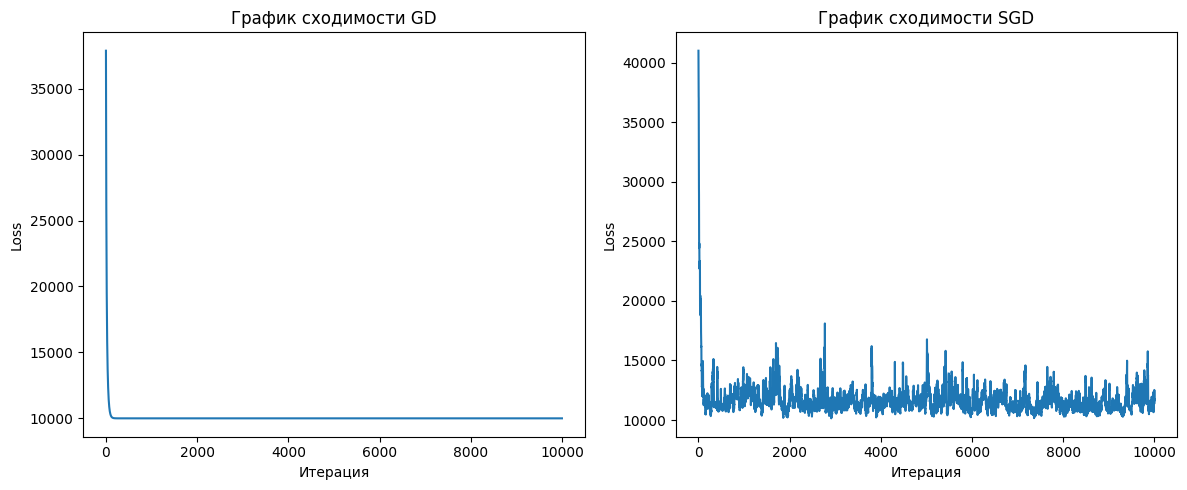

In [ ]:
# Преобразуем в numpy arrays
X = np.array(X)
y = np.array(y)

# Функция для предсказания
def predict(X, w):
    X = np.hstack((np.ones((X.shape[0], 1)), X))
    return np.dot(X, w)

# Функция потерь (MSE)
def compute_cost(X, y, theta):
    m = len(y)
    cost = (1./m) * (np.linalg.norm(X @ theta - y) ** 2)
    return cost

# Измерение времени и обучение моделей
# OLS
start_time = time.time()
w_ols = ols_solution(X, y)
ols_time = time.time() - start_time
y_pred_ols = predict(X, w_ols)
r2_ols = r2_score(y, y_pred_ols)

# GD
start_time = time.time()
loss_history_gd, w_gd = gradient_descent(X, y, 0.01, 10000)
gd_time = time.time() - start_time
y_pred_gd = predict(X, w_gd)
r2_gd = r2_score(y, y_pred_gd)

# SGD
start_time = time.time()
loss_history_sgd, w_sgd = stochastic_gradient_descent(X, y, 0.01, 10000)
sgd_time = time.time() - start_time
y_pred_sgd = predict(X, w_sgd)
r2_sgd = r2_score(y, y_pred_sgd)

# Вывод результатов
print("Время выполнения:")
print(f"OLS: {ols_time:.4f} сек")
print(f"GD: {gd_time:.4f} сек")
print(f"SGD: {sgd_time:.4f} сек")

print("\nR2 scores:")
print(f"OLS: {r2_ols:.4f}")
print(f"GD: {r2_gd:.4f}")
print(f"SGD: {r2_sgd:.4f}")

# Построение графиков сходимости
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(loss_history_gd)
plt.title('График сходимости GD')
plt.xlabel('Итерация')
plt.ylabel('Loss')

plt.subplot(1, 2, 2)
plt.plot(loss_history_sgd)
plt.title('График сходимости SGD')
plt.xlabel('Итерация')
plt.ylabel('Loss')

plt.tight_layout()
plt.show()

Все, методы справились с нахождением минимума. Наиболее успешным оказался обычный градиентный спуск, но разница с точным решением на уровне погрешности(100-ые доли), думаю с ней это и связано.

## Задание 7 (1.5 балла).

* **(0.5 балла)**. Добавьте в функцию из задания 5 L2-регуляризацию и, соответственно, новый аргумент - коэффициент при регуляризаторе.

* **(1 балл)**. На сгенерированных выше данных обучите модифицированный алгоритм SGD с регуляризацией: в цикле перебирайте значения коэффициента регуляризации от 0.1 до 1 с шагом 0.1. Для каждого значения обучите модель и сделайте предсказание, выведите значение r2. Для какого значения коэффициента регуляризации получилось наилучшее качество r2, почему?

In [ ]:
from random import randrange
import numpy as np
from sklearn.metrics import r2_score

def stochastic_gradient_descent(X, y, learning_rate, iterations, lambda_reg):
    """
    Стохастический градиентный спуск с L2-регуляризацией для линейной регрессии

    Parameters:
    X : numpy array - матрица признаков
    y : numpy array - вектор целевых значений
    learning_rate : float - скорость обучения
    iterations : int - количество итераций
    lambda_reg : float - коэффициент регуляризации

    Returns:
    w : numpy array - вектор весов
    """
    def compute_cost(X, y, theta):
        m = len(y)
        cost = (1./m) * (np.linalg.norm(X @ theta - y) ** 2) + lambda_reg * np.sum(theta[1:] ** 2)
        return cost

    X = np.hstack((np.ones((X.shape[0], 1)), X))
    params = np.random.rand(X.shape[1])

    m = X.shape[0]
    cost_track = np.zeros((iterations, 1))

    for i in range(iterations):
        idx = randrange(m)

        X_j = X[idx:idx+1]
        y_j = y[idx:idx+1]

        gradient = 2 * (X_j.T @ ((X_j @ params) - y_j)) + 2 * lambda_reg * np.r_[[0], params[1:]]
        params = params - learning_rate * gradient

        cost_track[i] = compute_cost(X, y, params)

    return cost_track, params

# Перебор значений коэффициента регуляризации
best_r2 = -np.inf
best_lambda = None

for lambda_reg in np.arange(0.1, 1.1, 0.1):
    _, w_sgd = stochastic_gradient_descent(X, y, learning_rate=0.01, iterations=10000, lambda_reg=lambda_reg)
    y_pred_sgd = predict(X, w_sgd)
    r2_sgd = r2_score(y, y_pred_sgd)

    print(f"Параметр регуляризации: {lambda_reg:.1f}, R2: {r2_sgd:.4f}")

    if r2_sgd > best_r2:
        best_r2 = r2_sgd
        best_lambda = lambda_reg

print(f"\nНаилучшее значение R2: {best_r2:.4f} при lambda = {best_lambda:.1f}")

Lambda: 0.1, R2: 0.7319
Lambda: 0.2, R2: 0.7252
Lambda: 0.3, R2: 0.6971
Lambda: 0.4, R2: 0.6405
Lambda: 0.5, R2: 0.6523
Lambda: 0.6, R2: 0.6642
Lambda: 0.7, R2: 0.6206
Lambda: 0.8, R2: 0.6482
Lambda: 0.9, R2: 0.5806
Lambda: 1.0, R2: 0.5892

Наилучшее значение R2: 0.7319 при lambda = 0.1


С ростом параметра регуляризации, качество модели ухудшается.
Возможная причина: данные с явной искусственной линейной зависимостью и регуляризация мешает обучиться

## Задание 8 (2 балла)

Реализуйте на выбор одну из оптимизаций градиентного спуска - Momentum или  AdaGrad. Необходимые выкладки вы можете подсмотреть [здесь](https://education.yandex.ru/handbook/ml/article/optimizaciya-v-ml).

In [ ]:
def modified_grad_descent(X, y, learning_rate, iterations, momentum=0.9):
    """
    Градиентный спуск с моментом

    Parameters:
    X : numpy array - матрица признаков
    y : numpy array - вектор целевых значений
    learning_rate : float - скорость обучения
    iterations : int - количество итераций
    momentum : float - коэффициент момента
    """
    X = np.hstack((np.ones((X.shape[0], 1)), X))
    params = np.random.rand(X.shape[1])
    velocity = np.zeros_like(params)

    m = X.shape[0]
    cost_track = np.zeros((iterations, 1))

    for i in range(iterations):
        # Вычисляем градиент
        grad = 2./m * (X.T @ ((X @ params) - y))

        # Обновляем скорость с учетом момента
        velocity = momentum * velocity - learning_rate * grad

        # Обновляем параметры
        params = params + velocity

        # Сохраняем значение функции потерь
        cost_track[i] = (1./m) * (np.linalg.norm(X @ params - y) ** 2)

    return cost_track, params

## Бонус

## Задание 9 (0.5 балла)

Существует [метод Ньютона](https://en.wikipedia.org/wiki/Newton%27s_method_in_optimization) (метод второго порядка) для поиска минимума функции.

Известно, что методы второго порядка точнее, чем методы первого порядка (то есть те, которые используют только первую производную для оптимизации). Как вы думаете, почему в оптимизации функций потерь все формулы используют только производные первого порядка? Почему не используют метод Ньютона?

`Метод Ньютона не используется по причинам:`

1.   В моделях с большим числом параметров, хранение O(n^2) данных и выполнение O(n^3) вычислений для нахождение Гессиана является слишком дорогим удовольствием.
2.   Возможные вычислительные проблемы из-за плохой обусловленности.
3.   Тяжело использовать стохастические методы, так как оценка Гессиана через Гессиан на батче имеет большую дисперсию в сравнении с оценками градиента.

## **Часть Котобонус** 🐈

Ура-ура, с вами снова кот, который может добавить вам баллы!
- 0.25, если вы угадаете, чей он
- 0.05 если просто предположите

**Подсказка:** кот одной из наших замечательных ассистенток!


[Кайфующий кот](https://ibb.co/qxjz2tp)

@alonagolubovich